# **Промышленность**

**Цели и задачи**

Чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали. 
- Необходимо построить модель, которая предскажет температуру стали.

**Описание технологического процесса**

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша.

Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»).

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. slab, «плита»).

**Процесс обработки**

- сталь заливают в ковш
- подогрев до нужной температуры
- вывод серы, добавление примеси и отбор пробы
- измерение температуры
- проводение химического анализа
- повышение температуры
- добавление легирующих материалов
- продувка сплава инертным газом
- перемешивание
- достижение целевого химического состава и оптимальной температуры плавки

**Описание данных**

- data_arc.csv — данные об электродах
- data_bulk.csv — данные о подаче сыпучих материалов (объём)
- data_bulk_time.csv — данные о подаче сыпучих материалов (время)
- data_gas.csv — данные о продувке сплава газом
- data_temp.csv — результаты измерения температуры
- data_wire.csv — данные о проволочных материалах (объём)
- data_wire_time.csv — данные о проволочных материалах (время)

Во всех файлах столбец key содержит номер партии. В файлах может быть несколько строк с одинаковым значением key: они соответствуют разным итерациям обработки.

**Содержание и план проекта**

[1  Исследовательский анализ](#section1)

- [1.1  Подготовка данных](#section1.1)

- [1.2  Загрузка данных](#section1.2)

- [1.3  Анализ](#section1.3)

 - [1.3.1  data_arc.csv — данные об электродах](#section1.3.1)
 - [1.3.2  data_bulk.csv - данные о подаче сыпучих материалов (объём)](#section1.3.2)
 - [1.3.3  data_bulk_time.csv — данные о подаче сыпучих материалов (время)](#section1.3.3)
 - [1.3.4  data_gas.csv — данные о продувке сплава газом](#section1.3.4)
 - [1.3.5  data_temp.csv — результаты измерения температуры](#section1.3.5)
 - [1.3.6  data_wire.csv — данные о проволочных материалах (объём)](#section1.3.6)
 - [1.3.7  data_wire_time.csv — данные о проволочных материалах (время)](#section1.3.7)

[2  Предобработка данных](#section2)

- [2.1  Подготовка целевого признака](#section2.1)

- [2.2  Объединение таблиц и работа с признаками](#section2.2)

[3  Построение модели машинного обучения](#section3)

- [3.1  Разделение данных на обучающую и тестовую выборки](#section3.1)

- [3.2  Определение моделей для обучения](#section3.2)

- [3.3  Обучение модели](#section3.3)

 - [3.3.1  DecisionTreeRegressor](#section3.3.1)
 - [3.3.2  RandomForestRegressor](#section3.3.2)
 - [3.3.3  LGBMRegressor](#section3.3.3)
 - [3.3.4  XGBRegressor](#section3.3.4)
 - [3.3.5  CatBoostRegressor](#section3.3.5)

- [3.4  Сравнение моделий и выбор лучшей](#section3.4)

- [3.5  Тестирование лучшей модели](#section3.5)

[4  Общий вывод](#section4)

<a id='section1'></a>
## Исследовательский анализ

<a id='section1.1'></a>
### Подготовка данных

In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# библиотеки для машинного обучения
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostRegressor

from time import time



In [2]:
# обозначим константу обозначенную при первом знакомстве
STATE = np.random.RandomState(13022023)
# отключим предупреждающие сообщения, потому как в процессе работы такие возникали
pd.options.mode.chained_assignment = None

<a id='section1.2'></a>
### Загрузка данных

In [3]:
# сохраним данные в переменных
data_arc = pd.read_csv('/datasets/final_steel/data_arc.csv')
data_bulk = pd.read_csv('/datasets/final_steel/data_bulk.csv')
data_bulk_time = pd.read_csv('/datasets/final_steel/data_bulk_time.csv')
data_gas = pd.read_csv('/datasets/final_steel/data_gas.csv')
data_temp = pd.read_csv('/datasets/final_steel/data_temp.csv')
data_wire = pd.read_csv('/datasets/final_steel/data_wire.csv')
data_wire_time = pd.read_csv('/datasets/final_steel/data_wire_time.csv')

<a id='section1.3'></a>
### Анализ

In [4]:
# Напишем функцию для вывода информации
def data_analysis(data, describe = True):
    display(data)
    print()
    print('Общая информация о таблице:')
    print()
    display(data.info())
    print()
    if describe == True:
        print('Основные статистики числовых параметров:')
        print()
        display(data.describe())
    print()
    print('Максимальное количество строк с пропусками в таблице:', data.isna().sum().max())
    print()
    print('Количество дубликатов в таблице:', data.duplicated().sum())

<a id='section1.3.1'></a>
#### data_arc.csv — данные об электродах

In [5]:
data_analysis(data_arc)

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397
...,...,...,...,...,...
14871,3241,2019-09-01 03:58:58,2019-09-01 04:01:35,0.533670,0.354439
14872,3241,2019-09-01 04:05:04,2019-09-01 04:08:04,0.676604,0.523631
14873,3241,2019-09-01 04:16:41,2019-09-01 04:19:45,0.733899,0.475654
14874,3241,2019-09-01 04:31:51,2019-09-01 04:32:48,0.220694,0.145768



Общая информация о таблице:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


None


Основные статистики числовых параметров:



,key,Активная мощность,Реактивная мощность
count,14876.000000,14876.000000,14876.000000
mean,1615.220422,0.670441,0.452592
std,934.571502,0.408159,5.878702
min,1.000000,0.030002,-715.504924
25%,806.000000,0.395297,0.290991
50%,1617.000000,0.555517,0.415962
75%,2429.000000,0.857034,0.637371
max,3241.000000,3.731596,2.676388



Максимальное количество строк с пропусками в таблице: 0

Количество дубликатов в таблице: 0


**Визуализируем данные**

In [6]:
def visualization(data, features, union = False, box_plot = True):
    for feature in features:
        plt.figure(figsize = (17, 6))
        plt.hist(data[feature], histtype = 'bar', bins = 30)
        plt.title('Гистограмма параметра ' + feature)
        plt.xlabel('Количество итераций нагрева в одной партии')
        plt.ylabel('Частота')
        plt.grid(True)
        plt.show()
        #Бокс плот
        if box_plot == True:
            plt.figure(figsize = (15, 2))
            plt.boxplot(data[feature], vert = False)
            plt.xlabel('Количество итераций нагрева в одной партии')
            plt.title('Диаграмма размаха параметра ' + feature)
            plt.show()

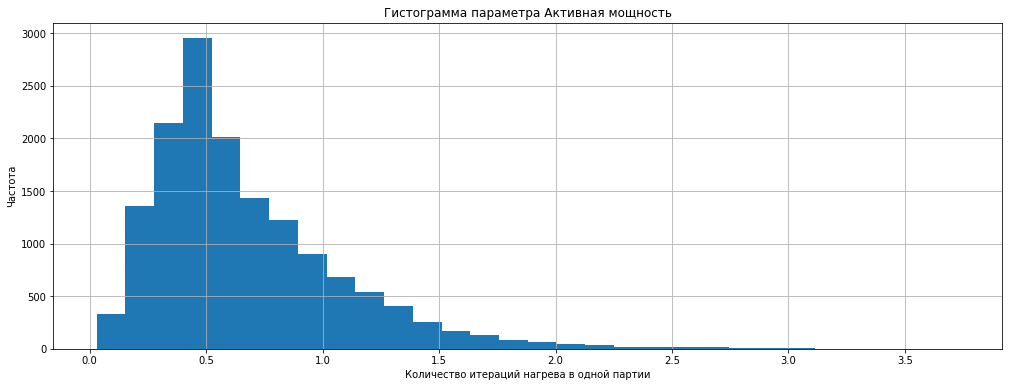

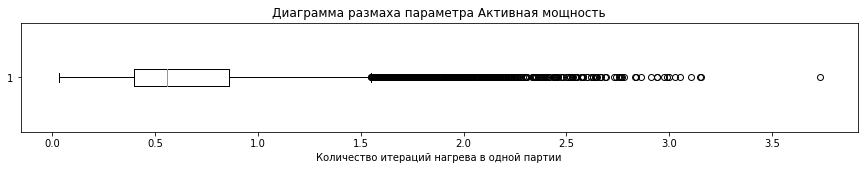

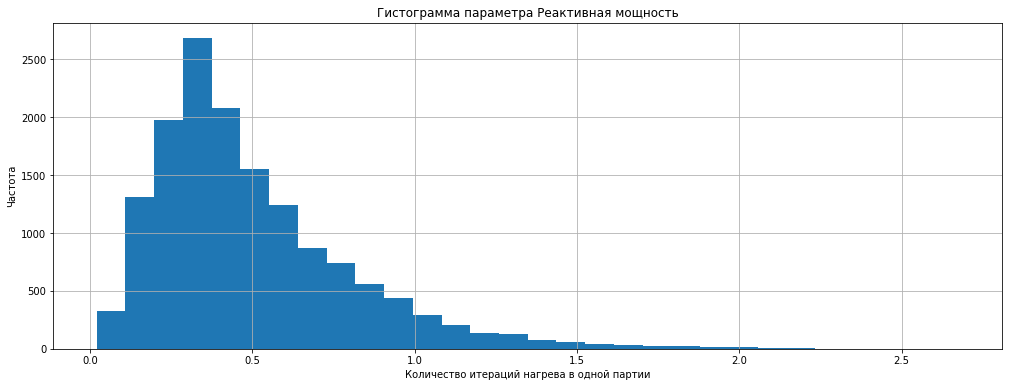

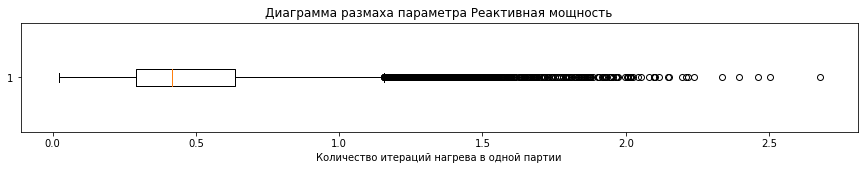

In [7]:
# исключим строку с высоким отрицательным значением для корректного отображения графика
visualization(data_arc.loc[data_arc.iloc[:, 4] > 0], data_arc.columns[3:5], union = False)

- распределения нормальные
- диаграммы распределения указывают на большое кол-во вбросов

**Вывод**
- пропусков и дубликатов нет
- столбец реактивная мощность имеет высокое отрицательное значение
- привести к datetime64 столбцы начало(конец) нагрева другой
- обработать вбросы

<a id='section1.3.2'></a>
#### data_bulk.csv - данные о подаче сыпучих материалов (объём)

In [8]:
data_analysis(data_bulk)

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,3237,NaN,NaN,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.0,NaN,130.0,206.0
3125,3238,NaN,NaN,126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.0,NaN,108.0,106.0
3126,3239,NaN,NaN,NaN,NaN,NaN,114.0,NaN,NaN,NaN,NaN,NaN,158.0,NaN,270.0,88.0
3127,3240,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.0,54.0



Общая информация о таблице:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


None


Основные статистики числовых параметров:



,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
count,3129.000000,252.000000,22.000000,1298.000000,1014.000000,77.000000,576.000000,25.000000,1.0,19.000000,176.000000,177.000000,2450.000000,18.000000,2806.000000,2248.000000
mean,1624.383509,39.242063,253.045455,113.879045,104.394477,107.025974,118.925347,305.600000,49.0,76.315789,83.284091,76.819209,260.471020,181.111111,170.284747,160.513345
std,933.337642,18.277654,21.180578,75.483494,48.184126,81.790646,72.057776,191.022904,NaN,21.720581,26.060347,59.655365,120.649269,46.088009,65.868652,51.765319
min,1.000000,10.000000,228.000000,6.000000,12.000000,11.000000,17.000000,47.000000,49.0,63.000000,24.000000,8.000000,53.000000,151.000000,16.000000,1.000000
25%,816.000000,27.000000,242.000000,58.000000,72.000000,70.000000,69.750000,155.000000,49.0,66.000000,64.000000,25.000000,204.000000,153.250000,119.000000,105.000000
50%,1622.000000,31.000000,251.500000,97.500000,102.000000,86.000000,100.000000,298.000000,49.0,68.000000,86.500000,64.000000,208.000000,155.500000,151.000000,160.000000
75%,2431.000000,46.000000,257.750000,152.000000,133.000000,132.000000,157.000000,406.000000,49.0,70.500000,102.000000,106.000000,316.000000,203.500000,205.750000,205.000000
max,3241.000000,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,772.000000,49.0,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000



Максимальное количество строк с пропусками в таблице: 3128

Количество дубликатов в таблице: 0


**план предобработки**
- столбец **Bulk 8** имеет единственное значение - проверить\уточнить
- большое кол-во пропусков, заполнить значения NaN на значение 0 (т.к. это данные содержат значения добавляемых сыпучих материалов, предположительное отсутствие значений - отсутстввие добавки)
- проверить сыпучие материалы, которые не использовались или использовались крайне редко, возможно исключить их из выборки для того, чтоб их наличие не сказалось отрицательно на обучении модели

<a id='section1.3.3'></a>
#### data_bulk_time.csv — данные о подаче сыпучих материалов (время)

In [9]:
data_analysis(data_bulk_time)

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:03:52,NaN,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaN,NaN,NaN,2019-05-03 11:46:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:40:20,NaN,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,NaN,NaN,NaN,2019-05-03 12:31:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:09:40,NaN,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,NaN,NaN,NaN,2019-05-03 12:48:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:41:24,NaN,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,NaN,NaN,NaN,2019-05-03 13:18:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:12:56,NaN,2019-05-03 13:12:56,2019-05-03 13:12:56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,3237,NaN,NaN,2019-08-31 22:51:28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-31 22:46:52,NaN,2019-08-31 22:46:52,2019-08-31 22:46:52
3125,3238,NaN,NaN,2019-08-31 23:39:11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-31 23:33:09,NaN,2019-08-31 23:33:09,2019-08-31 23:33:09
3126,3239,NaN,NaN,NaN,NaN,NaN,2019-09-01 01:51:58,NaN,NaN,NaN,NaN,NaN,2019-09-01 01:39:41,NaN,2019-09-01 01:33:25,2019-09-01 01:33:25
3127,3240,NaN,NaN,NaN,NaN,NaN,2019-09-01 03:12:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-01 02:41:27,2019-09-01 02:41:27



Общая информация о таблице:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


None


Основные статистики числовых параметров:



,key
count,3129.000000
mean,1624.383509
std,933.337642
min,1.000000
25%,816.000000
50%,1622.000000
75%,2431.000000
max,3241.000000



Максимальное количество строк с пропусками в таблице: 3128

Количество дубликатов в таблице: 0


**Вывод**
- привести к datetime64 информацию о дате добавления сыпучих материалов
- большое кол-во пробусков - обработать

<a id='section1.3.4'></a>
#### data_gas.csv — данные о продувке сплава газом

In [10]:
data_analysis(data_gas)

,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692
...,...,...
3234,3237,5.543905
3235,3238,6.745669
3236,3239,16.023518
3237,3240,11.863103



Общая информация о таблице:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


None


Основные статистики числовых параметров:



,key,Газ 1
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040



Максимальное количество строк с пропусками в таблице: 0

Количество дубликатов в таблице: 0


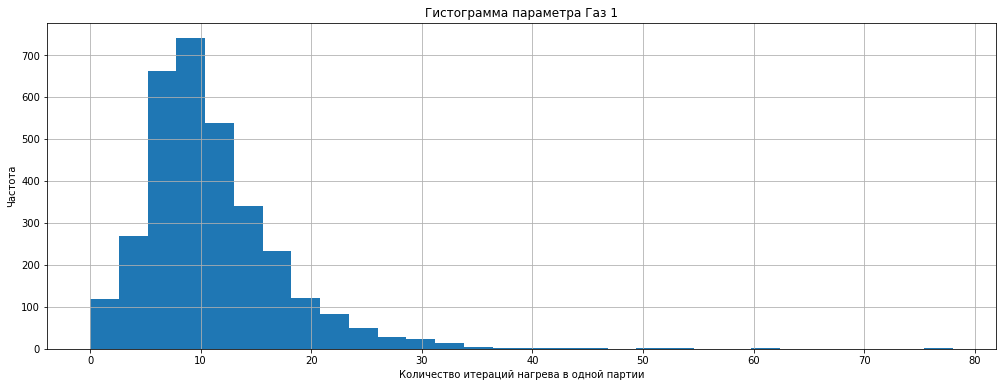

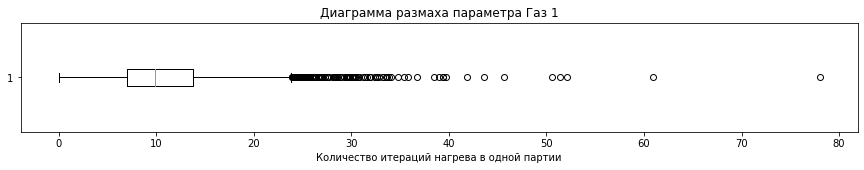

In [11]:
visualization(data_gas, [data_gas.columns[1]])

- распределение нормально
- имеются вбросы

**Вывод**
- большее число ключей, чем в предыдущих таблицах, значения max\min - совпадает. Возможно наличие партий, в чей состав не добавлялись супучие материалы, но продувка газом совершалась, либо совершалась продувка повторно

<a id='section1.3.5'></a>
#### data_temp.csv — результаты измерения температуры

In [12]:
data_analysis(data_temp)

,key,Время замера,Температура
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0
...,...,...,...
15902,3241,2019-09-01 04:03:30,1586.0
15903,3241,2019-09-01 04:16:12,NaN
15904,3241,2019-09-01 04:22:39,NaN
15905,3241,2019-09-01 04:33:42,NaN



Общая информация о таблице:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           15907 non-null  int64  
 1   Время замера  15907 non-null  object 
 2   Температура   13006 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.9+ KB


None


Основные статистики числовых параметров:



,key,Температура
count,15907.000000,13006.000000
mean,1607.880870,1591.840920
std,942.212073,21.375851
min,1.000000,1191.000000
25%,790.000000,1581.000000
50%,1618.000000,1591.000000
75%,2427.000000,1601.000000
max,3241.000000,1705.000000



Максимальное количество строк с пропусками в таблице: 2901

Количество дубликатов в таблице: 0


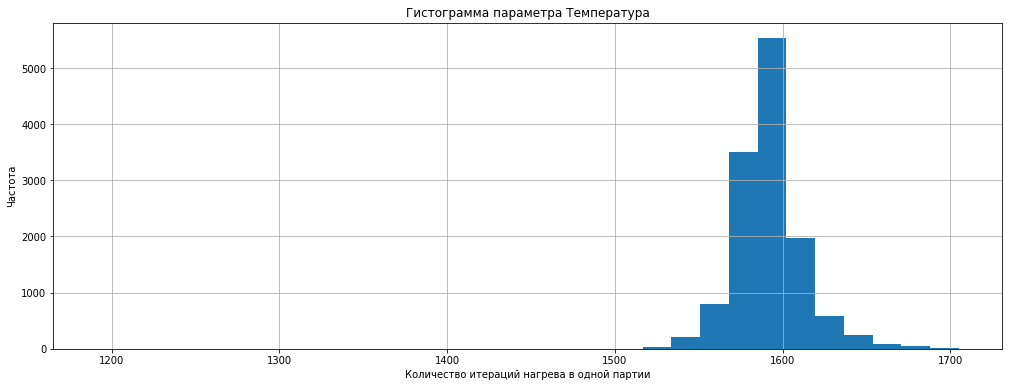

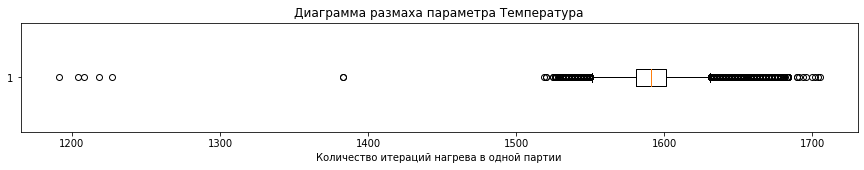

In [13]:
visualization(data_temp.dropna(axis=0), [data_temp.columns[2]])

- распределение нормальное, но очевидно присутствие вбросов
- согласно температурным условиям плавления стали это границы от 1400 - 1500 °C. На производстве этот процесс непрерывный и ковш всегда подогревается, для избежания остывания металла, значит все данные о температурных показателях ниже 1400 °C - вбросы.

**Вывод**
- max\min значений ключей совпадают с предыдущими данными из таблиц
- привести к datetime64 значения столбца "Время замера"
- пропущение значения температуры - обработать
- обработать вбросы

<a id='section1.3.6'></a>
#### data_wire.csv — данные о проволочных материалах (объём)

In [14]:
data_analysis(data_wire)

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3076,3237,38.088959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3077,3238,56.128799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3078,3239,143.357761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3079,3240,34.070400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Общая информация о таблице:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


None


Основные статистики числовых параметров:



,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
count,3081.000000,3055.000000,1079.000000,63.000000,14.000000,1.000,73.000000,11.000000,19.000000,29.000000
mean,1623.426485,100.895853,50.577323,189.482681,57.442841,15.132,48.016974,10.039007,53.625193,34.155752
std,932.996726,42.012518,39.320216,99.513444,28.824667,NaN,33.919845,8.610584,16.881728,19.931616
min,1.000000,1.918800,0.030160,0.144144,24.148801,15.132,0.034320,0.234208,45.076721,4.622800
25%,823.000000,72.115684,20.193680,95.135044,40.807002,15.132,25.053600,6.762756,46.094879,22.058401
50%,1619.000000,100.158234,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
75%,2434.000000,126.060483,70.227558,276.252014,76.124619,15.132,64.212723,11.886057,48.089603,43.862003
max,3241.000000,330.314424,282.780152,385.008668,113.231044,15.132,180.454575,32.847674,102.762401,90.053604



Максимальное количество строк с пропусками в таблице: 3080

Количество дубликатов в таблице: 0


**Вывод**
- большое кол-во пропусков - обработать. По аналогии с таблицей "данные о подаче сыпучих материалов" заполнить значения NaN - значение 0, в виду того, что данная таблица содержит информацию о проволочных материалах, которые добавляют в состав справа, по этому, если данных нет - значит объём добавок нулевой

<a id='section1.3.7'></a>
#### data_wire_time.csv — данные о проволочных материалах (время)

In [15]:
data_analysis(data_wire_time)

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:11:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:13:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:48:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:18:15,2019-05-03 13:32:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3076,3237,2019-08-31 22:50:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3077,3238,2019-08-31 23:38:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3078,3239,2019-09-01 01:50:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3079,3240,2019-09-01 03:12:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Общая информация о таблице:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


None


Основные статистики числовых параметров:



,key
count,3081.000000
mean,1623.426485
std,932.996726
min,1.000000
25%,823.000000
50%,1619.000000
75%,2434.000000
max,3241.000000



Максимальное количество строк с пропусками в таблице: 3080

Количество дубликатов в таблице: 0


**Вывод**
- аналогия с таблицей data_wire - несёт информацию о времени, данные которой могут быть избыточное, как и данные в таблице data_bulk_time
- большое кол-во пропусков - обработать

**Вывод и план работы:**
- провести запланированные преобразования в каждой из таблиц
- собрать общую таблицу, мерджить по ключам
- обнулить информацию о процессах, происходящих позже последнего замера температуры
- обучить модели (еще не определился, скорее каждая из мделей LinearRegression, RandomForestRegressor, CatBoostRegressor, LGBMRegressor, XGBRegressor, по условию минимум 3 модели)
- получить MAE <= 6.8
- выбор лучшей
- проверка качества лучшей модели на тестовой выборке

<a id='section2'></a>
## Предобработка данных

<a id='section2.1'></a>
### Подготовка целевого признака

Прежде, чем приступать к объединению таблиц, необходимо проверить на адекватность данные: в частности, сделать таблицу с итоговым значением температуры (целевое значение) и сравнить время конечного измерения температуры с остальными таблицами в которых так же указано время:

- время подачи материала для плавления по двум таблицам
- время нагрева

Таблицу df_temp с целевой метрикой преобразуем и найдем целевую - последнее измерение температуры, а так же сохраним данные о первом измерении, как дополнительном параметре

In [16]:
# преобразовываем в нужный формат
data_temp['Время замера'] = pd.to_datetime(data_temp['Время замера'], format='%Y-%m-%d %H:%M:%S')

# создаём сводную таблицу с первым измерением, для дальнейшего исследования
data_temp_last = data_temp.groupby('key').agg('max')['Время замера']
data_temp_last = pd.DataFrame(data_temp_last)
data_temp_last = data_temp_last.merge(data_temp, on = 'Время замера', how = 'left')
data_temp_last.set_axis(['time_last','key','temp_last'], axis = 'columns', inplace = True)

# создаём сводную таблицу с последним измерением, целевой метрикой 
data_temp_first = data_temp.groupby('key').agg('min')['Время замера']
data_temp_first = pd.DataFrame(data_temp_first)
data_temp_first = data_temp_first.merge(data_temp, on = 'Время замера', how = 'left')
data_temp_first.set_axis(['time_first','key','temp_first'], axis = 'columns', inplace = True)

# объединяем таблицы
data = data_temp_first.merge(data_temp_last, on = 'key', how = 'left')\
                  .reindex(columns = ['key', 'time_first', 'temp_first', 'time_last', 'temp_last'])

# сохраним список с пустыми значениями целевой метрики
keys_with_na = list(data[data['temp_last'].isna()]['key'])
keys_not_na = list(data[~data['temp_last'].isna()]['key'])

# посмотрим таблицу
data

,key,time_first,temp_first,time_last,temp_last
0,1,2019-05-03 11:16:18,1571.0,2019-05-03 11:30:39,1613.0
1,2,2019-05-03 11:37:27,1581.0,2019-05-03 11:59:12,1602.0
2,3,2019-05-03 12:13:17,1596.0,2019-05-03 12:34:57,1599.0
3,4,2019-05-03 12:52:57,1601.0,2019-05-03 12:59:25,1625.0
4,5,2019-05-03 13:23:19,1576.0,2019-05-03 13:36:01,1602.0
...,...,...,...,...,...
3211,3237,2019-08-31 22:44:04,1569.0,2019-08-31 23:05:43,NaN
3212,3238,2019-08-31 23:30:31,1584.0,2019-08-31 23:43:00,NaN
3213,3239,2019-09-01 01:31:47,1598.0,2019-09-01 02:24:15,NaN
3214,3240,2019-09-01 02:39:01,1617.0,2019-09-01 03:35:16,NaN


In [17]:
data['temp_last'].isna().sum()

739

In [18]:
data = data.dropna()

Как видно из таблицы, у целевой метрики есть пропуски. Неизвестно, можно ли заполнить такие значения. Если нет - такие строки проще удалить.

Так же удалим те строки, где первое измерение равно последнему, чтобы не допустить утечки данных.

In [19]:
data = data[data['temp_first'] != data['temp_last']]

Создадим функции для проверки адекватности и вывода строк, которые не прошли проверку

In [20]:
# проверка адекватности построчно

def check_time(row):
    return row['time_last'] == row['max_time']

Создадим функцию для объединения таблиц и проверки на адекватность с выводом строк, не соответсвующих значению,
так как используются только три оставшиеся таблицы со временем. 
Объединим их всех с таблицей где есть целевая метрика и получим список ключей, которые не прошли адекватность

In [33]:

def list_of_errors(list_of_data):
    df = data[['key', 'time_last']].merge(list_of_data[0], on='key', how='left')
    for dataset in list_of_data[1:]:
        df = df.merge(dataset, on='key', how='left')
    df['max_time'] = df.drop('key', axis=1).max(axis=1)
    df['check_error'] = df.apply(check_time, axis=1)
    keys = list(df[df['check_error'] == 0]['key'])
    return keys

Преобразуем данные в datetime

In [22]:

data_arc['Конец нагрева дугой'] = pd.to_datetime(data_arc['Конец нагрева дугой'], format = '%Y-%m-%d %H:%M:%S')
data_arc['Начало нагрева дугой'] = pd.to_datetime(data_arc['Начало нагрева дугой'], format = '%Y-%m-%d %H:%M:%S')

for col in data_bulk_time:
    if col != 'key':
        data_bulk_time[col] = pd.to_datetime(data_bulk_time[col], format = '%Y-%m-%d %H:%M:%S')
        
for col in data_wire_time:
    if col != 'key':
        data_wire_time[col] = pd.to_datetime(data_wire_time[col], format = '%Y-%m-%d %H:%M:%S')

# создадим сводную таблицу, где есть последнее время нагрева 
data_arc_maxtime = pd.DataFrame(data_arc.groupby('key').agg('max')['Конец нагрева дугой'])
data_arc_maxtime.reset_index(inplace = True)

In [23]:
data_with_time = [data_arc_maxtime, data_bulk_time, data_wire_time]
keys_errors = list_of_errors(data_with_time)

len(keys_errors)

134

Строки не прошедшие адекватность можно исключить при дальнейшем использовании в модели.

<a id='section2.2'></a>
### Объединение таблиц и работа с признаками

Необходимо расширить признаковое пространство и передать модели.

Исключим те партии, которые не прошли адкватность, во всех таблицах, необходимых в объединении

In [24]:
data = data[~data['key'].isin(keys_errors)]
data_wire = data_wire[~data_wire['key'].isin(keys_errors)]
data_bulk = data_bulk[~data_bulk['key'].isin(keys_errors)]
data_arc = data_arc[~data_arc['key'].isin(keys_errors)]
data_gas = data_gas[~data_gas['key'].isin(keys_errors)]

Перед объединением таблиц, дополним некоторые параметры

Исходя из физики, полная мощность рассчитывается по формуле:

$$
S = \sqrt(Q^2+P^2)
$$

где:

- S - полная мощность
- Q - активная мощность
- P - реактивная мощность

И дополним расчет полным временем нагрева, а так же посчитаем энергию - Время нагрева умноженная на полную мощность.

In [25]:
data_arc['Полная мощность'] = (data_arc['Активная мощность'] ** 2 + data_arc['Реактивная мощность'] ** 2) ** (0.5)

data_arc['Время нагрева'] = (
    data_arc['Конец нагрева дугой'] - data_arc['Начало нагрева дугой']
)

data_arc['Время нагрева'] = data_arc['Время нагрева'].apply(pd.Timedelta.total_seconds).astype('int')

data_arc['Энергия'] = data_arc['Время нагрева'] * data_arc['Полная мощность']

data_arc

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность,Полная мощность,Время нагрева,Энергия
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084,1.193639,228,272.149755
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285,0.959010,185,177.416785
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805,0.896038,172,154.118502
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669,1.970470,365,719.221394
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397,0.807239,148,119.471318
...,...,...,...,...,...,...,...,...
14871,3241,2019-09-01 03:58:58,2019-09-01 04:01:35,0.533670,0.354439,0.640648,157,100.581755
14872,3241,2019-09-01 04:05:04,2019-09-01 04:08:04,0.676604,0.523631,0.855559,180,154.000682
14873,3241,2019-09-01 04:16:41,2019-09-01 04:19:45,0.733899,0.475654,0.874560,184,160.919002
14874,3241,2019-09-01 04:31:51,2019-09-01 04:32:48,0.220694,0.145768,0.264489,57,15.075853


Создадим сводную таблицу, в которой будет общая сумма времени нагрева и энергии по всей партии, которая войдет в итоговую таблицу

In [26]:
data_arc_keys = data_arc.groupby('key').sum()[['Время нагрева', 'Энергия', 'Полная мощность']].reset_index()
data_arc_keys

,key,Время нагрева,Энергия,Полная мощность
0,1,1098,1442.377754,5.826395
1,2,811,881.233565,3.649216
2,3,655,525.066777,2.989534
3,4,741,796.911309,3.814962
4,5,869,1199.137958,4.035758
...,...,...,...,...
3075,3237,909,958.336236,4.844982
3076,3238,546,555.867370,2.696542
3077,3239,1216,1013.067719,5.611883
3078,3240,839,729.208940,3.891856


По таблицам материалов, которые добавлялись в партию, заполним пустые значения нулями, и рассмотрим несколько вариантов решений, для этого создадим функцию. Необходимо:

- Взять все столбцы и использовать их в модели.
- Рассчитать общую сумму добавления материала Wire и Bulk и добавить итог в общую таблицу.
- Убрать те материалы, которые добавляли редко и добавить остальные.
- Рассчитать сумму по редким материалам, а те, которые добавляют часто - оставить без изменений.
- Рассчитать сумму по редким материалам, а те, которые добавляют часто - оставить без изменений, а так же добавить параметр, в котором указано количество добавок в данной партии.

In [27]:
def make_new_data(data, name):
    
    col_for_sum = []

    for col in data:
        if data[col].isna().sum() >= (len(data) - 1000):
            col_for_sum.append(col)
    
    data[f'count_{name}'] = data.drop('key', axis = 1).count(axis=1)
    
    data[f'sum_{name}'] = data[col_for_sum].sum(axis = 1)
    
    col_lasted = [col for col in data.columns if col not in col_for_sum]
    
    data = data[col_lasted].fillna(0)
    
    return data

Для моделирования воспользуемся сначала 5 пунктом и посмотрим на результаты модели:

In [28]:
bulk = make_new_data(data_bulk, 'Bulk')
wire = make_new_data(data_wire, 'Wire')

In [29]:
bulk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3002 entries, 0 to 3128
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   key         3002 non-null   int64  
 1   Bulk 3      3002 non-null   float64
 2   Bulk 12     3002 non-null   float64
 3   Bulk 14     3002 non-null   float64
 4   Bulk 15     3002 non-null   float64
 5   count_Bulk  3002 non-null   int64  
 6   sum_Bulk    3002 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 187.6 KB


In [30]:
wire.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2956 entries, 0 to 3080
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   key         2956 non-null   int64  
 1   Wire 1      2956 non-null   float64
 2   Wire 2      2956 non-null   float64
 3   count_Wire  2956 non-null   int64  
 4   sum_Wire    2956 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 138.6 KB


Создаём итоговую таблицу и сразу удалим те строки, где есть пропуски, так как там у тех партий нет наблюдений в других таблицах

In [31]:
df = data.drop(['time_first', 'time_last'], axis = 1)
df = df.merge(bulk, on = 'key', how = 'left')
df = df.merge(wire, on = 'key', how = 'left')
df = df.merge(data_arc_keys[['key', 'Время нагрева', 'Энергия', 'Полная мощность']], on = 'key', how = 'left')
df = df.merge(data_gas, on = 'key', how = 'left')
df = df.dropna()

df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2171 entries, 0 to 2298
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   key              2171 non-null   int64  
 1   temp_first       2171 non-null   float64
 2   temp_last        2171 non-null   float64
 3   Bulk 3           2171 non-null   float64
 4   Bulk 12          2171 non-null   float64
 5   Bulk 14          2171 non-null   float64
 6   Bulk 15          2171 non-null   float64
 7   count_Bulk       2171 non-null   float64
 8   sum_Bulk         2171 non-null   float64
 9   Wire 1           2171 non-null   float64
 10  Wire 2           2171 non-null   float64
 11  count_Wire       2171 non-null   float64
 12  sum_Wire         2171 non-null   float64
 13  Время нагрева    2171 non-null   int64  
 14  Энергия          2171 non-null   float64
 15  Полная мощность  2171 non-null   float64
 16  Газ 1            2171 non-null   float64
dtypes: float64(15)

,key,temp_first,temp_last,Bulk 3,Bulk 12,Bulk 14,Bulk 15,count_Bulk,sum_Bulk,Wire 1,Wire 2,count_Wire,sum_Wire,Время нагрева,Энергия,Полная мощность,Газ 1
0,1,1571.0,1613.0,0.0,206.0,150.0,154.0,4.0,43.0,60.059998,0.00000,1.0,0.0,1098,1442.377754,5.826395,29.749986
1,2,1581.0,1602.0,0.0,206.0,149.0,154.0,4.0,73.0,96.052315,0.00000,1.0,0.0,811,881.233565,3.649216,12.555561
2,3,1596.0,1599.0,0.0,205.0,152.0,153.0,4.0,34.0,91.160157,0.00000,1.0,0.0,655,525.066777,2.989534,28.554793
3,4,1601.0,1625.0,0.0,207.0,153.0,154.0,4.0,81.0,89.063515,0.00000,1.0,0.0,741,796.911309,3.814962,18.841219
4,5,1576.0,1602.0,0.0,203.0,151.0,152.0,4.0,78.0,89.238236,9.11456,2.0,0.0,869,1199.137958,4.035758,5.413692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2294,2495,1570.0,1591.0,21.0,256.0,129.0,223.0,5.0,90.0,89.150879,0.00000,1.0,0.0,723,778.818234,3.986869,7.125735
2295,2496,1554.0,1591.0,0.0,256.0,129.0,226.0,5.0,185.0,114.179527,0.00000,1.0,0.0,940,875.261419,5.057033,9.412616
2296,2497,1571.0,1589.0,0.0,230.0,124.0,226.0,4.0,85.0,94.086723,9.04800,2.0,0.0,569,556.930349,2.885017,6.271699
2297,2498,1591.0,1594.0,90.0,206.0,129.0,207.0,5.0,101.0,118.110717,0.00000,1.0,0.0,750,767.817794,4.143749,14.953657


Посмотрим на корреляцию зависимости дополнительных параметров

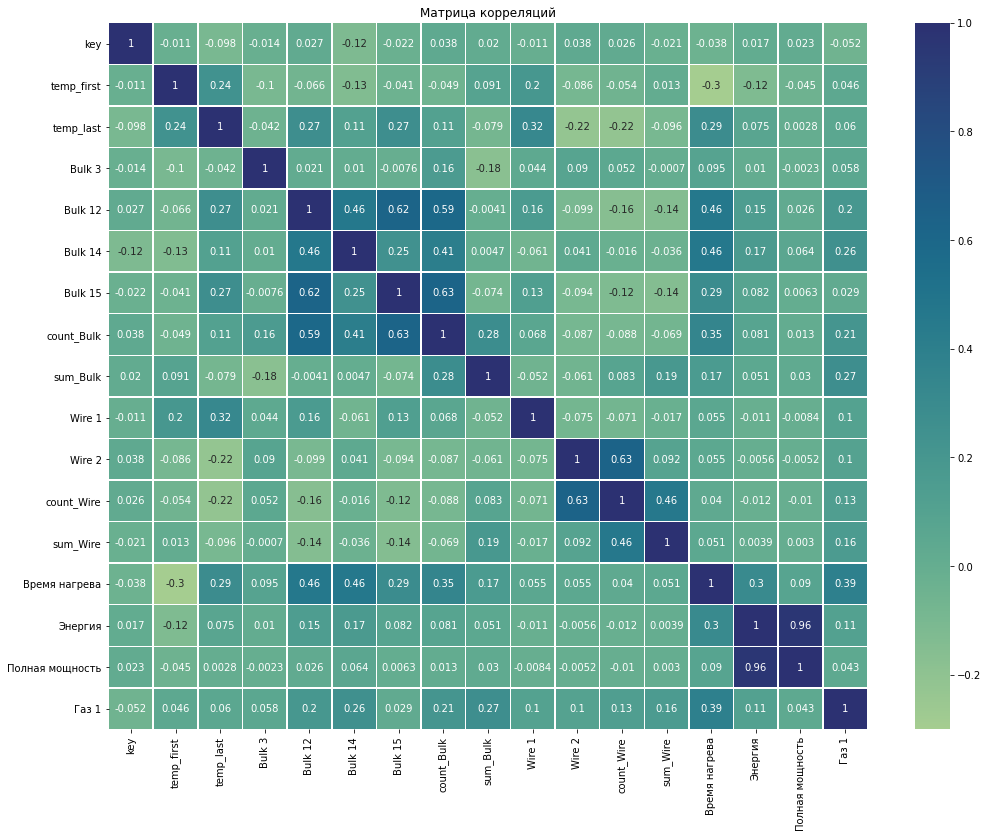

In [32]:
plt.figure(figsize = (17, 13))
plt.title('Матрица корреляций')

sns.heatmap(df.corr(), annot = True, linewidth = .5, cmap="crest")

plt.show()

Исходя из полученной матрицы, можно заметить, что значения Энергии и Полной мощности - мультиколлинеарны. Т.к. параметры эти мер были расчитаны, перед делением на тренеровочную и тестовую выборки - такие параметры стоит удалить, остальные можно оставить, по причине, что они не коррелируют между собой.

**Вывод**
- определён целевой признак для обучения модели
- данные предобработаны и объеденины в общую таблицу
- построена матрица корреляции, для определения корреляции между собой признаков

<a id='section3'></a>
## Построение модели машинного обучения

<a id='section3.1'></a>
### Разделение данных на обучающую и тестовую выборки

Разделим датасет на обучающую и тестовую в соотношении 4/1, а так же предварительно перемешаем дополнительно наблюдения, так как в изначальном датасете все данные были распределены по времени

In [33]:
# добавим библиотеку для возможномти перемешать масив
from sklearn.utils import shuffle

df_shuffled = shuffle(df, random_state = STATE)

df_shuffled.info()

df_features = df_shuffled.drop(['key', 'temp_last', 'Энергия', 'Полная мощность'], axis = 1)
df_target = df_shuffled['temp_last']

train_features, test_features, train_target, test_target = train_test_split(df_features, 
                                                                            df_target,
                                                                            test_size = 0.25,
                                                                            random_state = STATE)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2171 entries, 636 to 1597
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   key              2171 non-null   int64  
 1   temp_first       2171 non-null   float64
 2   temp_last        2171 non-null   float64
 3   Bulk 3           2171 non-null   float64
 4   Bulk 12          2171 non-null   float64
 5   Bulk 14          2171 non-null   float64
 6   Bulk 15          2171 non-null   float64
 7   count_Bulk       2171 non-null   float64
 8   sum_Bulk         2171 non-null   float64
 9   Wire 1           2171 non-null   float64
 10  Wire 2           2171 non-null   float64
 11  count_Wire       2171 non-null   float64
 12  sum_Wire         2171 non-null   float64
 13  Время нагрева    2171 non-null   int64  
 14  Энергия          2171 non-null   float64
 15  Полная мощность  2171 non-null   float64
 16  Газ 1            2171 non-null   float64
dtypes: float64(1

In [35]:
df_features

,temp_first,Bulk 3,Bulk 12,Bulk 14,Bulk 15,count_Bulk,sum_Bulk,Wire 1,Wire 2,count_Wire,sum_Wire,Время нагрева,Газ 1
636,1605.0,46.0,0.0,157.0,0.0,3.0,81.0,197.308791,0.000000,1.0,0.000000,730,15.429043
1210,1579.0,50.0,0.0,0.0,0.0,1.0,0.0,71.089195,11.219520,2.0,0.000000,859,8.291357
1553,1584.0,0.0,0.0,99.0,0.0,1.0,0.0,115.081200,50.125919,3.0,30.030001,633,9.875761
1453,1566.0,0.0,204.0,99.0,102.0,3.0,0.0,47.174400,65.085281,2.0,0.000000,824,6.880943
1930,1616.0,21.0,586.0,307.0,235.0,5.0,44.0,131.258398,34.291919,2.0,0.000000,1525,15.834248
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,1581.0,0.0,206.0,100.0,203.0,3.0,0.0,100.114563,43.097599,2.0,0.000000,894,7.991257
1015,1616.0,121.0,106.0,128.0,104.0,6.0,136.0,106.142403,44.124081,2.0,0.000000,763,7.453013
770,1596.0,0.0,484.0,203.0,203.0,4.0,62.0,140.119202,0.000000,1.0,0.000000,833,11.375267
1983,1561.0,99.0,329.0,196.0,190.0,6.0,128.0,121.124634,0.000000,1.0,0.000000,895,7.698340


<a id='section3.2'></a>
### Определение моделей для обучения

Для моделирования определены следующие модели:

- Дерево решений 
- Случайный лес 
- LightGBM
- XGBoost
- CatBoost

Создадим таблицу для последующего анализа и выбора оптимальной модели

In [36]:
analisys = pd.DataFrame({'model':[], 'MAE_model':[], 'MAE_on_train':[]})
all_models = []

Создадим функцию для подбора параметров методом GridSearchCV

In [37]:
def train_model(model, parameters):
    
    model_random = GridSearchCV(estimator = model,
                                param_grid = parameters, # используем параметры
                                scoring = 'neg_mean_absolute_error', # используем необходимую метрику
                                cv=2, 
                                verbose=1)

    # время обучения 
    start = time()
    model_random.fit(train_features, train_target)
    print('GridSearchCV подбирал параметры %.2f секунд' %(time() - start))
    
    # высчитаем метрики
    rmse = model_random.best_score_ * -1
    rmse_on_train = mean_absolute_error(train_target, model_random.predict(train_features))
    
    print('Лучшие параметры:', model_random.best_params_)
    print('MAE обученной модели:', rmse)
    print('MAE на тренировочной выборке:', rmse_on_train)
    
    # заполним все таблицы    
    all_models.append(model_random)
    row = []
    row.extend([model, rmse, rmse_on_train])
    analisys.loc[len(analisys.index)] = row
    
    return model_random

<a id='section3.3'></a>
### Обучение модели

<a id='section3.3.1'></a>
#### DecisionTreeRegressor

In [38]:
ran_grid_tree = {"max_depth": list(range(3, 13))}

dtr = DecisionTreeRegressor()

dtr_random = train_model(dtr, ran_grid_tree)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
GridSearchCV подбирал параметры 0.17 секунд
Лучшие параметры: {'max_depth': 5}
MAE обученной модели: 7.5604079324057984
MAE на тренировочной выборке: 6.247123069846488


<a id='section3.3.2'></a>
#### RandomForestRegressor

In [39]:
ran_grid_forest = {
    'max_depth': list(range(3, 13)),
    'n_estimators': [50, 100, 200, 300]
}

rfr = RandomForestRegressor(n_jobs = -1)

rfr_random = train_model(rfr, ran_grid_forest)

Fitting 2 folds for each of 40 candidates, totalling 80 fits
GridSearchCV подбирал параметры 48.08 секунд
Лучшие параметры: {'max_depth': 9, 'n_estimators': 200}
MAE обученной модели: 6.539712373104732
MAE на тренировочной выборке: 4.093087885039515


<a id='section3.3.3'></a>
#### LGBMRegressor

In [38]:
rand_lgbm_param = {
    'max_depth': [5, 10, 15, 25, 35],
    'learning_rate': [0.01, 0.1, 0.15]
}

gbm = lgb.LGBMRegressor(boosting_type='gbdt',
                         objective = 'regression',
                         metric = 'RMSE')

gbm_random = train_model(gbm, rand_lgbm_param)

Fitting 2 folds for each of 15 candidates, totalling 30 fits
GridSearchCV подбирал параметры 26.92 секунд
Лучшие параметры: {'learning_rate': 0.1, 'max_depth': 5}
MAE обученной модели: 6.7287623758249175
MAE на тренировочной выборке: 4.391658030674858


<a id='section3.3.4'></a>
#### XGBRegressor

In [39]:
rand_xgb_param = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7],
    'learning_rate': [0.1, 0.15, 0.3]
}

xb = xgb.XGBRegressor(booster = 'gbtree', 
                      eval_metric = 'rmse', 
                      use_rmm = True,
                     verbosity = 0)

xb_random = train_model(xb, rand_xgb_param)

Fitting 2 folds for each of 21 candidates, totalling 42 fits
GridSearchCV подбирал параметры 126.00 секунд
Лучшие параметры: {'learning_rate': 0.15, 'max_depth': 3}
MAE обученной модели: 6.430139640039543
MAE на тренировочной выборке: 4.932166397132217


<a id='section3.3.5'></a>
#### CatBoostRegressor

In [40]:
rand_cat_param = {
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.1]
}

cat = CatBoostRegressor(verbose = False) 

cat_random = train_model(cat, rand_cat_param)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
GridSearchCV подбирал параметры 56.58 секунд
Лучшие параметры: {'learning_rate': 0.01, 'max_depth': 4}
MAE обученной модели: 6.366219367506947
MAE на тренировочной выборке: 5.612605774175938


<a id='section3.4'></a>
### Сравнение моделий и выбор лучшей

Обеденим результаты расчетов обучения моделий в таблицу и посмотрим визуально различия на графиках

In [41]:
all_names = pd.DataFrame({'names':['DecisionTree', 'RandomForest', 'LightGBM', 'XGBoost', 'CatBoost']})
analisys = pd.concat([analisys, all_names], axis = 1, join = 'inner')
display(analisys)


,model,MAE_model,MAE_on_train,names
0,DecisionTreeRegressor(),7.569007,6.247123,DecisionTree
1,RandomForestRegressor(n_jobs=-1),6.536139,3.720896,RandomForest
2,"LGBMRegressor(metric='RMSE', objective='regres...",6.728762,4.391658,LightGBM
3,"XGBRegressor(base_score=None, booster='gbtree'...",6.430140,4.932166,XGBoost
4,<catboost.core.CatBoostRegressor object at 0x7...,6.366219,5.612606,CatBoost


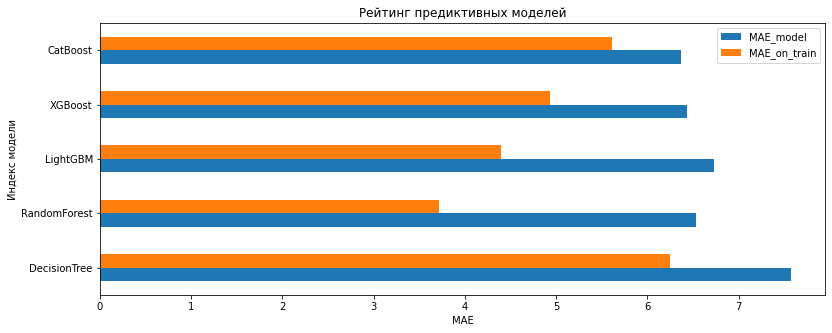

In [42]:
analisys.plot(x = 'names', kind="barh", fontsize=10, figsize=(13, 5))
plt.title("Рейтинг предиктивных моделей")
plt.xlabel("MAE")
plt.ylabel("Индекс модели")
plt.show()

Самой результативной оказалась модель RandomForest.

<a id='section3.5'></a>
### Тестирование лучшей модели

Воспользуемся обученной моделью и посмотрим метрики на тестовой выборке:

In [43]:
predicted = rfr_random.predict(test_features)
mae_on_test = mean_absolute_error(test_target, predicted)
print('MAE на тестовой выборке:', mae_on_test)

MAE на тестовой выборке: 6.616677133134593


Итоговая метрика ниже 6.8  по условию. Модель можно использовать.

Раасмотрим какие параметры имели большее значение при обучении модели.

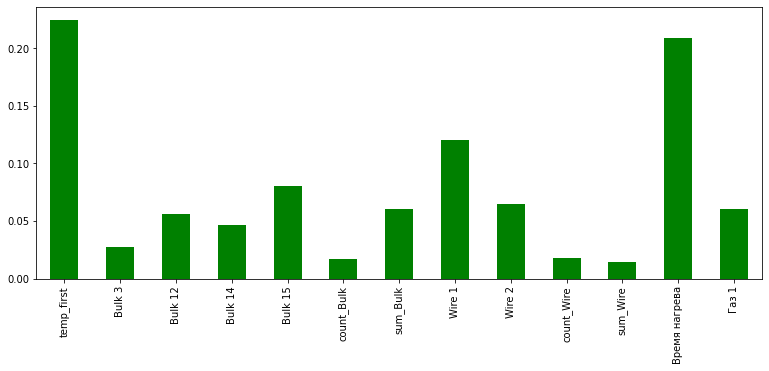

In [44]:
features = pd.Series(rfr_random.best_estimator_.feature_importances_, index = train_features.columns)

plt.figure(figsize=(13,5))
features.plot.bar(color="green")
plt.show()

Как можно заметить из графика, наиболее важными параметрами при обучении модели:
- общее время нагрева 
- начальное измерение температуры
- проволочный и сыпучий материал 

<a id='section4'></a>
## Общий вывод

Целью исследования являлась оптимизация производственных расходов. Поставленная задача -  определение финального значения температуры сплава в плавильном ковше. В качестве входных данных имелись объемные таблицы с информацией о времени, количестве добавок, температуре и прочее.

В процессе предобработки было выявлено следующее - данные являются достаточно "сырыми", т.е. имеют большое количество пропусков, несостыковок по времени. Так же, имелись партии металла, которые в процессе производства не прошли необходимое количество стадий. Возможно, имел место технический сбой. Несмотря на вышеперечисленное удалось выделить выборку в ~ 2100 объектов.

Обучили 5 моделей. От простой линейной регрессии до бустингов. Самой результативной оказалась RandomForest.

Можно продолжить улучшать модель, как пример - алгоритм автоматической генерации признаков, на основе имеющихся. Возможно в данных еще осталась большая доля информации, которая поможет сильно уменьшить ошибку предсказания. Так же можно подобрать лучшие параметры и для бустинга, однако, каждый из способов - это прежде всего время, которое в определенных моментах ограничено.

**Отчёт**

**1. Какие пункты плана были выполнены, а какие — нет (поясните почему)?**

План работы был следующий:
- подготовка данных
- анализ
- предобработка
- подготовка целевого признака
- объединение данных в общую таблицу
- построение модели машинного обучения
- обучение модели
- сравнение результатов моделей
- тестирование лучшей
- общий вывод и отчет

Каждый из этапов плана был выполнен.

**2. Какие трудности возникли и как вы их преодолели?**

- Постановка задачи и составление первоначального плана действий - Скорее подобная проблема была из-за небольшого опыта в работе с такими проектами. Сложно только начать. Решением проблемы было следующее - начать делать хоть что-то, далее уже это что-то преобразовывать в понятную работу.
- Понимание производственного цикла производства стали - только информация из открытых источников, хорошо, что этого хватило для общего представления работы.

**3. Какие ключевые шаги в решении задачи выделили?**

Ключевые шаги в реализации схожи с планом работы с одним отличием - это первоначальное составление этого плана.

1. Постановка задачи и первоначального плана - наверно одна из не самых простых задач - это составить план для последующих действий
2. Анализ данных - знакомство с данными, графическое представление данных из таблиц, проверка данных на аномалии
3. Предобработка данных - обработать вбросы, выделение признаков и таргета, соединение таблиц
4. Построение модели машинного обучения
  - Разделение данных на обучающую и тестовую выборки;
  - Обучение моделей
  - Выбор лучшей модели
  - Тестирование лучшей модели
5. Заключение
6. Соблюдение "чистоты" в коде

**4. Какая ваша итоговая модель и какое у неё качество?**

Итоговая модель - RandomForest с параметрами: {'max_depth': 9, 'n_estimators': 200}. Итоговая метрика модели MAE: 6.6167.<br>

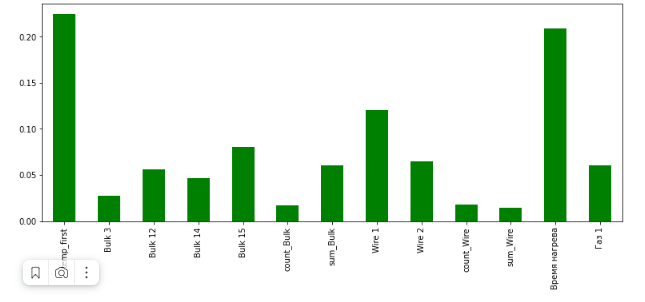